# Import des librairies

In [1]:
#Import Librairies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import math

    
%matplotlib inline

# Chargement des fichiers

In [2]:
country = pd.read_csv('EdStatsCountry.csv')
data = pd.read_csv('EdStatsData.csv')
countryseries = pd.read_csv('EdStatsCountry-Series.csv')
footnote = pd.read_csv('EdStatsFootNote.csv')
series = pd.read_csv('EdStatsSeries.csv')

# Examen des fichiers

##Examen du fichier "CountrySeries"

In [3]:
countryseries.head(3)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


Le fichier countryseries comporte 613 lignes et donne des indications sur les sources des données de divers couples Indicateur/Pays.


Examen des doublons : 

In [4]:
countryseries['CountryCode'].duplicated

<bound method Series.duplicated of 0      ABW
1      ABW
2      AFG
3      AFG
4      AFG
      ... 
608    ZAF
609    ZMB
610    ZMB
611    ZWE
612    ZWE
Name: CountryCode, Length: 613, dtype: object>

In [5]:
countryseries['CountryCode'].nunique()

211

On enlève la colonne "Unnamed:3" remplie de valeurs manquantes

In [6]:
countryseries.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)

###Examen du fichier "Country"

In [7]:
#Examen du fichier : Country
country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [8]:
country.shape

(241, 32)

On enlève les valeurs manquantes sur la colonne Unnamed31

In [9]:
country.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)

In [10]:
country.shape

(241, 31)

In [11]:
areas = country[~country['Country Code'].isin(countryseries['CountryCode'].unique())][['Short Name']]
#areas = areas.values
areas = areas['Short Name'].values
areas

array(['Arab World', 'Curaçao', 'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',
       'Europe & Central Asia (all income levels)', 'Euro area',
       'European Union', 'High income',
       'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean (developing only)',
       'Latin America & Caribbean (all income levels)',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'St. Martin (French part)',
       'Middle East & North Africa (all income levels)', 'Middle income',
       'Middle East & North Africa (developing only)', 'North America',
       'Nauru', 'OECD members', 'South Asia',
       'Sub-Saharan Africa (developing only)', 'South Sudan',
       'Sub-Saharan Africa (all income levels)',
       'Sint Maarten (Dutch part)', 'Upper middle income', 'World'],
      dtype=object)

In [12]:
list_countries = country[~country['Short Name'].isin(areas)]['Short Name'].unique().tolist()
print(list_countries)

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Micronesia', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'The Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenad

###Ce fichier contient des informations sur l'économie des pays, ainsi qu'un classement par région de chaque pays. D'autres informations concernent aussi des groupes de pays par région ou niveau de revenu

##On ne retrouve pas le même nombre de pays dans le fichier countryseries que dans le fichier country. On met en place une ligne pour connaitre les différences

##Analyse du fichier Footnote

In [13]:
footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [14]:
#La colonne "Year" est inexploitable - Pour avoir une meilleure exploitation de cette dataframe, nous devons enlever tous les "YR" :
footnote['Year'] = footnote['Year'].apply(lambda x : x[2:])

In [15]:
footnote['Year']

0         2001
1         2005
2         2000
3         2004
4         2006
          ... 
643633    2007
643634    2014
643635    2015
643636    2017
643637    2017
Name: Year, Length: 643638, dtype: object

In [16]:
footnote.shape

(643638, 5)

In [17]:
footnote.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)

La table "FootNote" comporte 643638 lignes, et donne des précisions (mode de calcul ou autre) relatives à divers couples Indicateur/Pays.


##Analyse du fichier series

In [18]:
#Examen du fichier Series
series.head(3)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
series.shape

(3665, 21)

In [20]:
series.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)

La table "Series" est composée de 3665 lignes correspondant chacune à un indicateur statistique.


##Analyse table data

In [21]:
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data['Indicator Code'].nunique()

3665

In [23]:
data['Indicator Name'].nunique()

3665

In [24]:
data.shape

(886930, 70)

In [25]:
data['Country Name'].nunique()

242

In [26]:
# Les valeurs dupliquées correspondent aux lignes qui ont le même pays et le même indicateur.
duplicates = data.duplicated(subset=["Country Code","Indicator Code"], keep='first')

if True in list(duplicates.unique()):
    print("Il existe des données dupliquées.")
else:
    print("Il n'y a aucune donnée dupliquée.")

Il n'y a aucune donnée dupliquée.


            ##La table "Data" est composée de 886930 lignes qui correspondent à toutes les combinaisons des entrées uniques des colonnes "Country Code" et "Indicator Code" (respectivement 242 et 3665 entrées uniques). On trouve dans chaque ligne correspondant à un couple Indicateur/Pays la valeur d'un indicateur pour un pays.  On constate beaucoup de valeurs manquantes, dans le même ordre de grandeur pour toutes les années, on pourrait donc classer les années par décennie pour pouvoir avoir moins de NaN. 
            Pour la suite de notre analyse, nous n'utiliserons pas les fichiers footnote et Series.

# Exploration des données

Nous avons vu que de nombreuses lignes sont entièrement vides.

Pour alléger les données, nous allons supprimer ces lignes qui ne contiennent aucune information.

In [27]:
list_columns = list(data.loc[:,"1970":"2100"])
data_clean = data.dropna(how="all", subset=list_columns)
data_clean

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,52.448921,52.489750,52.635593,53.327000,54.184654,54.865627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Trop de colonnes contiennent des valeurs manquantes, il serait judicieux de classer ces colonnes par décennie et non plus par année, cela nous permettrait d'avoir moins de colonnes à traiter et avoir une meilleure vision de l'évolution indicateurs

In [28]:
data['1970s'] = data[[str(year) for year in range(1970,1980,1)]].mean(1)

data['1980s'] = data[[str(year) for year in range(1980,1990,1)]].mean(1)
data['1990s'] = data[[str(year) for year in range(1990,2000,1)]].mean(1)
data['2000s'] = data[[str(year) for year in range(2000,2010,1)]].mean(1)
data['2010s'] = data[[str(year) for year in [2010,2011,2012,2013,2014,2015,2016,2017]]].mean(1)
data['2020s'] = data[[str(year) for year in [2020,2025]]].mean(1)
data['2030s'] = data[[str(year) for year in [2030,2035]]].mean(1)
data['2040s'] = data[[str(year) for year in [2040,2045]]].mean(1)
data['2050s'] = data[[str(year) for year in [2050,2055]]].mean(1)
data['2060s'] = data[[str(year) for year in [2060,2065]]].mean(1)
data['2070s'] = data[[str(year) for year in [2070,2075]]].mean(1)
data['2080s'] = data[[str(year) for year in [2080,2085]]].mean(1)
data['2090s'] = data[[str(year) for year in [2090,2095]]].mean(1)
data['2100s'] = data[[str(2100)]].mean(1)

In [29]:
data.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'], axis=1, inplace=True)


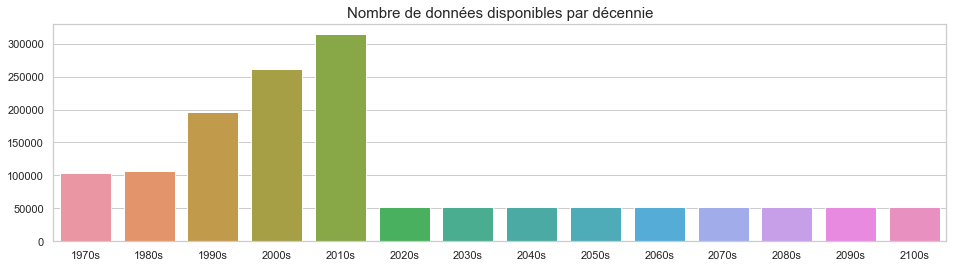

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))
plt.title('Nombre de données disponibles par décennie', size=15)
plot = sns.barplot(y = data.shape[0] - data[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().values, x = data[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().index)
plt.show()

Prenant en compte les deux fichiers principaux Data et Country, on essaye de les lier, pour avoir le maximum d'informations sur le même fichier

In [31]:
data = data.merge(right = country[['Country Code', 'Region']], 
                  on='Country Code', how='left')

In [32]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s', 'Region'],
      dtype='object')

In [33]:
data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous allons à ce stade examiner les indicateurs que nous voulons utiliser : du passé, du présent et du futur pour avoir une vision exhaustive. Nous sélectionnerons les 4 indicateurs les plus représentatifs des années 2000 et 2010 pour notre analyse actuelle, puis des indicateurs de projection pour notre analyse du futur :

In [34]:
data_2k10 = data[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '2010s']]

In [36]:
data_2k10[~pd.isnull(data_2k10['2010s'])][['Indicator Name', '2010s']].groupby('Indicator Name').count().sort_values(by='2010s',ascending=False)


,2010s
Indicator Name,
Population growth (annual %),240
"Population, total",240
Internet users (per 100 people),229
GDP per capita (current US$),229
GDP at market prices (current US$),229
...,...
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Cinyanja. 2nd Grade,1
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Dagaare. 2nd Grade,1
EGRA: Reading Comprehension - Share of students scoring at least 80 percent (%). Dagbani. 2nd Grade,1


In [37]:
data_2k10[['Indicator Code', '2010s']].groupby('Indicator Code').count().sort_values(by='2010s',ascending=False)

,2010s
Indicator Code,
SP.POP.TOTL,240
SP.POP.GROW,240
IT.NET.USER.P2,229
NY.GDP.MKTP.CD,229
NY.GDP.PCAP.CD,229
...,...
LO.LLECE.REA6.P25,0
LO.LLECE.REA6.P10,0
LO.EGRA.CWPM.SPN.2GRD,0


In [38]:
data_2k00 = data[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '2000s']]

In [39]:
data_2k00[~pd.isnull(data_2k00['2000s'])][['Indicator Name', '2000s']].groupby('Indicator Name')\
.count().sort_values(by='2000s',ascending=False)


,2000s
Indicator Name,
"Population, total",240
Population growth (annual %),240
GDP at market prices (current US$),233
GDP per capita (current US$),233
Internet users (per 100 people),230
...,...
EGRA: Oral Reading Fluency - Share of students with a zero score (%). Bomu. 2nd Grade,1
EGRA: Oral Reading Fluency - Share of students with a zero score (%). Bamanankan. 2nd Grade,1
EGRA: Oral Reading Fluency - Correct Words Read Per Minute (Mean). Spanish. 3rd Grade,1


In [40]:
data_2k00[~pd.isnull(data_2k00['2000s'])][['Indicator Code', '2000s']]\
.groupby('Indicator Code').count().sort_values(by='2000s',ascending=False).head(10)

,2000s
Indicator Code,
SP.POP.GROW,240
SP.POP.TOTL,240
NY.GDP.PCAP.CD,233
NY.GDP.MKTP.CD,233
IT.NET.USER.P2,230
NY.GNP.MKTP.CD,225
SE.PRM.ENRL,225
SE.PRM.ENRL.FE,225
SE.PRM.ENRL.FE.ZS,225


Indicateurs futur (que nous utiliserons par la suite)

In [41]:
data_2k30 = data[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '2030s']]

In [42]:
data_2k30[['Indicator Name', '2030s']].groupby('Indicator Name').count().sort_values(by='2030s',ascending=False).head(20)

,2030s
Indicator Name,
Wittgenstein Projection: Percentage of the population age 15-19 by highest level of educational attainment. Post Secondary. Total,167
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Upper Secondary. Female,167
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. No Education. Total,167
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Female,167
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Male,167
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Total,167
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Primary. Female,167
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Primary. Male,167
Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Primary. Total,167


In [43]:
data_2k30[['Indicator Code', '2030s']].groupby('Indicator Code').count().sort_values(by='2030s',ascending=False).head(20)

,2030s
Indicator Code,
PRJ.ATT.60UP.1.MF,167
PRJ.ATT.2529.1.FE,167
PRJ.ATT.2064.4.MF,167
PRJ.ATT.2064.NED.FE,167
PRJ.ATT.2064.NED.MA,167
PRJ.ATT.2064.NED.MF,167
PRJ.ATT.2064.S1.FE,167
PRJ.ATT.2064.S1.MA,167
PRJ.ATT.2064.S1.MF,167


Pour notre analyse actuelle et passée, les indicateurs à prendre en compte seraient donc : Population SP.POP.TOTL, PIB NY.GDP.MKTP.CD et Internet per User IT.NET.USER.P2 et notre indicateur de population qui suit des études secondaires SE.SEC.ENRL.GC.FE. Pour notre projection, les indicateurs seraient la projection sur la proportion d'études des 15-19 ans PRJ.ATT.60UP.1.MF et des étudiants en secondaires 20-39 ans PRJ.ATT.2064.4.NED.MF et en secondaire supérieur PRJ.ATT.2529.1.MF	

##Etude statistique sur les indicateurs choisis


Nous sélectionnons pour notre analyse les pays qui font partie de notre première liste list_countries

In [43]:
data=data[data['Country Name'].isin(list_countries)]

## Indicateur sur la Population SP.POP.TOTL

On classe la liste des pays qui ont le plus d'habitants dans notre jeu de données, qui seront donc une base pour l'implantation de notrz start-up dans le marché :

In [44]:
data_population = data[data["Indicator Code"] == 'SP.POP.TOTL']

In [45]:
data_population.sort_values(by=['2010s','2000s'], ascending=False, inplace=True)
data_population.head()

C:\Users\nha5600\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
244423,China,CHN,"Population, total",SP.POP.TOTL,901944500.0,1.046603e+09,1.196836e+09,1.298791e+09,1.357724e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
416678,India,IND,"Population, total",SP.POP.TOTL,615330059.1,7.735364e+08,9.517766e+08,1.134569e+09,1.278133e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
849148,United States,USA,"Population, total",SP.POP.TOTL,215025900.0,2.369636e+08,2.645386e+08,2.943663e+08,3.162575e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
420343,Indonesia,IDN,"Population, total",SP.POP.TOTL,129230011.7,1.630953e+08,1.952671e+08,2.252755e+08,2.519365e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
189448,Brazil,BRA,"Population, total",SP.POP.TOTL,106546634.1,1.340964e+08,1.610416e+08,1.855241e+08,2.023258e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean


Pour la suite du choix des indicateurs, nous ferons à chaque fois une analyse statistique univariée de nos indicateurs afin d'extraire les 25% de pays qui remplissent à chaque fois le plus de conditions. 
On commence par une analyse statistique univariée sur notre indicateur data_population

In [51]:
data_population.describe()

,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s
count,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,4.700000e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,6.958402e+07,8.326972e+07,9.837972e+07,1.126788e+08,1.244645e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.548272e+08,1.839654e+08,2.156775e+08,2.429020e+08,2.623047e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.344309e+06,9.936578e+06,1.329078e+07,1.725592e+07,2.062000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.327529e+07,1.614261e+07,2.068624e+07,2.638578e+07,3.114808e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.583653e+07,3.254725e+07,3.849175e+07,4.296553e+07,4.658360e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.564356e+07,5.771013e+07,7.022421e+07,8.209917e+07,9.237351e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,9.019445e+08,1.046603e+09,1.196836e+09,1.298791e+09,1.357724e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous voulons nous implanter dans les pays les plus peuplés actuellement, nous prenons la référence de 20M d'habitants minimum pour notre analyse :

In [52]:
data_population = data_population[data_population['2010s'] > 2e7]
data_population.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
244423,China,CHN,"Population, total",SP.POP.TOTL,901944500.0,1.046603e+09,1.196836e+09,1.298791e+09,1.357724e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
416678,India,IND,"Population, total",SP.POP.TOTL,615330059.1,7.735364e+08,9.517766e+08,1.134569e+09,1.278133e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
849148,United States,USA,"Population, total",SP.POP.TOTL,215025900.0,2.369636e+08,2.645386e+08,2.943663e+08,3.162575e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
420343,Indonesia,IDN,"Population, total",SP.POP.TOTL,129230011.7,1.630953e+08,1.952671e+08,2.252755e+08,2.519365e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
189448,Brazil,BRA,"Population, total",SP.POP.TOTL,106546634.1,1.340964e+08,1.610416e+08,1.855241e+08,2.023258e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean


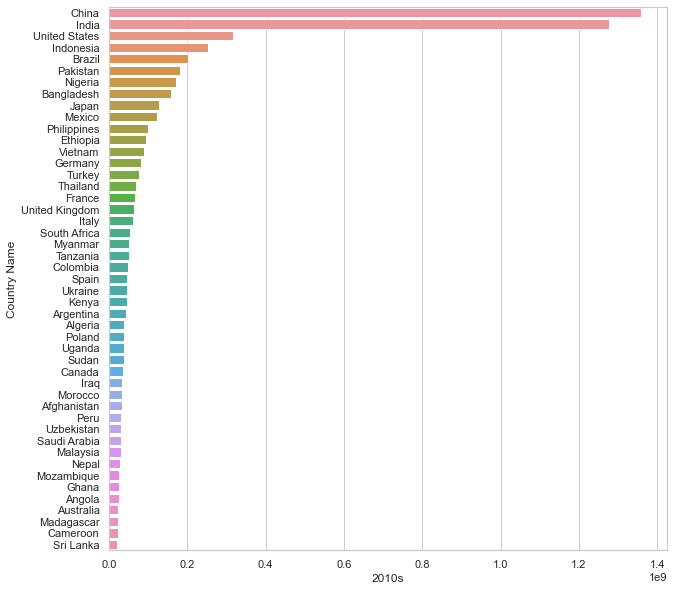

In [53]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=data_population['2010s'], y=data_population['Country Name']);

On crée une liste countries_pop contenant les pays les plus peuplés, ce sont ces pays nous serviront pour la suite de notre analyse :

In [54]:
# liste des pays présentés par ordre décroissant de population
countries_pop = data_population['Country Name'].tolist() 
print(countries_pop, end="\n\n\n")

['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Pakistan', 'Nigeria', 'Bangladesh', 'Japan', 'Mexico', 'Philippines', 'Ethiopia', 'Vietnam', 'Germany', 'Turkey', 'Thailand', 'France', 'United Kingdom', 'Italy', 'South Africa', 'Myanmar', 'Tanzania', 'Colombia', 'Spain', 'Ukraine', 'Kenya', 'Argentina', 'Algeria', 'Poland', 'Uganda', 'Sudan', 'Canada', 'Iraq', 'Morocco', 'Afghanistan', 'Peru', 'Uzbekistan', 'Saudi Arabia', 'Malaysia', 'Nepal', 'Mozambique', 'Ghana', 'Angola', 'Australia', 'Madagascar', 'Cameroon', 'Sri Lanka']




In [55]:
len(countries_pop)

47

Nous avons donc 47 pays de plus de 20M d'habitants. Ces pays nous serviront de base pour la suite de notre raisonnement. Voyons voir les pays dont le PIB est le plus élevé pour continuer notre analyse :

## Indicateur PIB/Habitant 

In [56]:
data_pib = data[data["Indicator Code"] == 'NY.GDP.PCAP.CD']

In [57]:
data_pib.sort_values(by=['2010s','2000s'], ascending=False, inplace=True)
data_pib

C:\Users\nha5600\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
507015,Liechtenstein,LIE,GDP per capita (current US$),NY.GDP.PCAP.CD,10209.938606,26443.433382,66446.080156,103514.674097,161621.007752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
569320,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,25984.693131,50233.185229,91318.135388,126395.707889,153128.123297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
514345,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,9063.734337,17844.907153,45126.370737,78454.870714,108906.609516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
627960,Norway,NOR,GDP per capita (current US$),NY.GDP.PCAP.CD,7586.421267,18205.773865,32462.870147,63057.545097,90834.593814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
169835,Bermuda,BMU,GDP per capita (current US$),NY.GDP.PCAP.CD,6309.172004,18308.530499,37850.086474,74693.565223,86346.751725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342090,French Polynesia,PYF,GDP per capita (current US$),NY.GDP.PCAP.CD,4727.459326,10419.703718,16923.946103,14530.777204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
605970,New Caledonia,NCL,GDP per capita (current US$),NY.GDP.PCAP.CD,5176.136693,8045.763996,16219.187668,12579.595106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
785555,Syrian Arab Republic,SYR,GDP per capita (current US$),NY.GDP.PCAP.CD,745.367098,1377.573756,939.241684,1469.880914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle East & North Africa
364080,Gibraltar,GIB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On établit notre analyse statistique univariée sur l'indicateur PIB

In [58]:
data_pib.describe()

,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s
count,125.000000,150.000000,182.000000,190.000000,186.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2545.432669,4579.618246,7922.490896,12459.508848,16798.311125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4254.450826,7075.985392,12795.101280,19369.581157,25436.337907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,95.966296,162.470575,117.430599,152.083211,276.981192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,351.674807,487.896353,621.684400,984.950587,1850.277196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,884.536190,1383.713627,2001.322324,3774.201803,6466.169285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2944.394578,5842.470000,10187.253691,14353.972421,19085.753980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,30039.178136,50233.185229,91318.135388,126395.707889,161621.007752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


25% des pays ont un PIB supérieur à 19085. Nous focuserons l'analyse sur les pays qui ont minimum un PIB à 20000 :

In [59]:
data_pib = data_pib[data_pib['2010s'] > 20000]
display(data_pib)

,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
507015,Liechtenstein,LIE,GDP per capita (current US$),NY.GDP.PCAP.CD,10209.938606,26443.433382,66446.080156,103514.674097,161621.007752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
569320,Monaco,MCO,GDP per capita (current US$),NY.GDP.PCAP.CD,25984.693131,50233.185229,91318.135388,126395.707889,153128.123297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
514345,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,9063.734337,17844.907153,45126.370737,78454.870714,108906.609516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
627960,Norway,NOR,GDP per capita (current US$),NY.GDP.PCAP.CD,7586.421267,18205.773865,32462.870147,63057.545097,90834.593814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
169835,Bermuda,BMU,GDP per capita (current US$),NY.GDP.PCAP.CD,6309.172004,18308.530499,37850.086474,74693.565223,86346.751725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
781890,Switzerland,CHE,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,21941.662341,41414.239438,53771.416576,82883.450322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
433715,Isle of Man,IMN,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,17078.998709,43531.915901,80498.292739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
671940,Qatar,QAT,GDP per capita (current US$),NY.GDP.PCAP.CD,13365.111832,20763.847232,16853.304648,48759.919336,77949.653212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle East & North Africa
518010,"Macao SAR, China",MAC,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,5608.255230,15130.321445,26081.637306,75424.883631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
129520,Australia,AUS,GDP per capita (current US$),NY.GDP.PCAP.CD,6176.907188,12540.010024,19932.192196,31876.301121,59755.083828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific


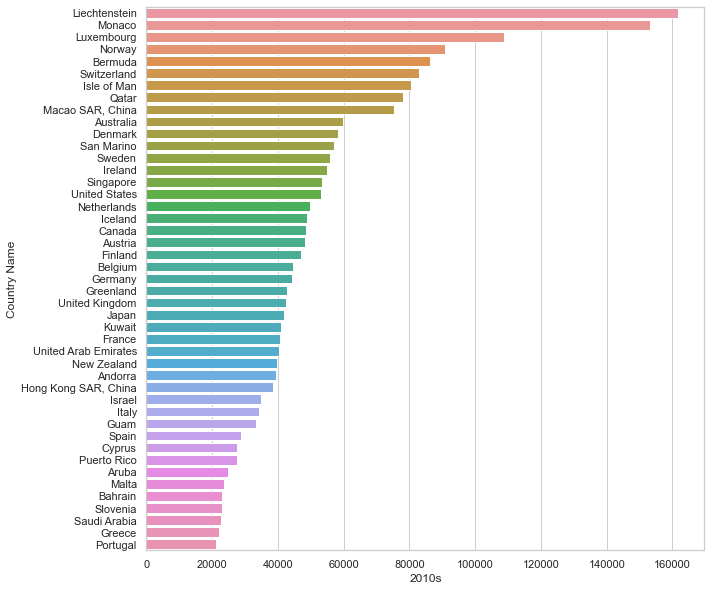

In [60]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=data_pib['2010s'], y=data_pib['Country Name']);

Nous créons la liste "countries_pib" qui nous servira de base pour la suite de notre analyse : 

In [61]:
# liste des pays 
countries_pib = data_pib['Country Name'].tolist() 
print(countries_pib, end="\n\n\n")

['Liechtenstein', 'Monaco', 'Luxembourg', 'Norway', 'Bermuda', 'Switzerland', 'Isle of Man', 'Qatar', 'Macao SAR, China', 'Australia', 'Denmark', 'San Marino', 'Sweden', 'Ireland', 'Singapore', 'United States', 'Netherlands', 'Iceland', 'Canada', 'Austria', 'Finland', 'Belgium', 'Germany', 'Greenland', 'United Kingdom', 'Japan', 'Kuwait', 'France', 'United Arab Emirates', 'New Zealand', 'Andorra', 'Hong Kong SAR, China', 'Israel', 'Italy', 'Guam', 'Spain', 'Cyprus', 'Puerto Rico', 'Aruba', 'Malta', 'Bahrain', 'Slovenia', 'Saudi Arabia', 'Greece', 'Portugal']




## Indicateur de présence d'Internet dans le pays :

In [62]:
data_internet = data[data["Indicator Code"] == 'IT.NET.USER.P2']
data_internet.sort_values(by=['2010s','2000s'], ascending=False, inplace=True)
data_internet

C:\Users\nha5600\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
411855,Iceland,ISL,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,14.256692,79.111353,96.509472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
628090,Norway,NOR,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,11.891903,77.878000,95.284552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
514475,Luxembourg,LUX,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,4.930072,61.029075,93.696330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
287245,Denmark,DNK,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,7.678432,72.984996,93.529716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
169965,Bermuda,BMU,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,19.880206,63.525135,93.181273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235935,Channel Islands,CHI,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
433845,Isle of Man,IMN,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
474160,Kosovo,XKX,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
624425,Northern Mariana Islands,MNP,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific


Analyse statistique univariée pour l'indicateur Internet :

In [63]:
data_internet.describe()

,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s
count,7.0,8.0,188.000000,187.000000,186.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,1.684749,20.078123,43.163960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,3.119032,21.160539,28.182869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,0.000000,0.105948,0.894407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.0,0.0,0.032921,3.046452,15.963461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.0,0.0,0.259722,12.560410,43.792554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.0,0.0,1.664100,32.246084,65.699505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.0,0.0,19.880206,79.111353,96.509472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


25% des pays ont plus de 66% de personnes utilisant Internet. Nous focusons notre étude sur les pays qui ont plus de 70% d'utilisateurs Internet

In [64]:
data_internet = data_internet[data_internet['2010s'] > 70]
display(data_internet)

,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
411855,Iceland,ISL,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,14.256692,79.111353,96.509472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
628090,Norway,NOR,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,11.891903,77.878000,95.284552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
514475,Luxembourg,LUX,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,4.930072,61.029075,93.696330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
287245,Denmark,DNK,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,7.678432,72.984996,93.529716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
169965,Bermuda,BMU,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,19.880206,63.525135,93.181273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
778355,Sweden,SWE,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,12.114162,76.664332,92.195800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
602435,Netherlands,NLD,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,9.901786,71.508741,91.822593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
507145,Liechtenstein,LIE,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,0.000000,60.158567,91.164686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
107660,Andorra,AND,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,3.819734,40.907365,90.453580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
844325,United Kingdom,GBR,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,5.044641,62.307285,89.441457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia


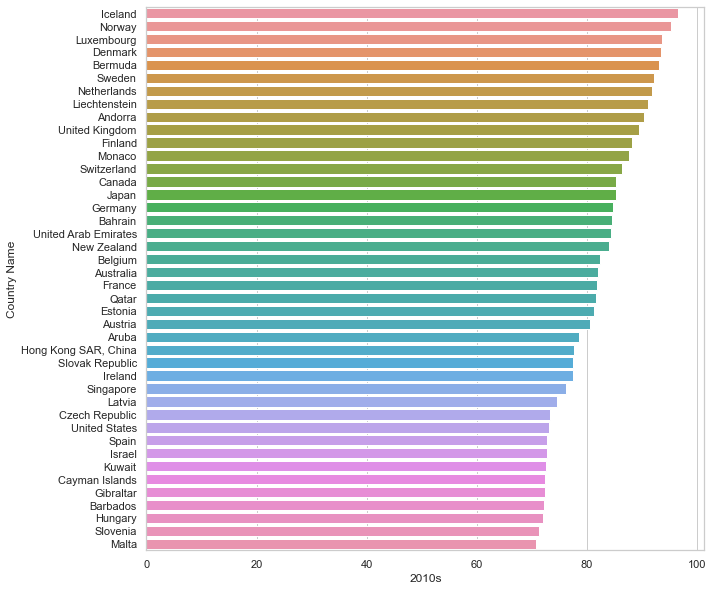

In [65]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=data_internet['2010s'], y=data_internet['Country Name']);

Nous créons la liste countries_internet, qui nous servira de base pour la suite :

In [66]:
countries_internet = data_internet["Country Name"].tolist()
print(countries_internet, end="\n\n")

['Iceland', 'Norway', 'Luxembourg', 'Denmark', 'Bermuda', 'Sweden', 'Netherlands', 'Liechtenstein', 'Andorra', 'United Kingdom', 'Finland', 'Monaco', 'Switzerland', 'Canada', 'Japan', 'Germany', 'Bahrain', 'United Arab Emirates', 'New Zealand', 'Belgium', 'Australia', 'France', 'Qatar', 'Estonia', 'Austria', 'Aruba', 'Hong Kong SAR, China', 'Slovak Republic', 'Ireland', 'Singapore', 'Latvia', 'Czech Republic', 'United States', 'Spain', 'Israel', 'Kuwait', 'Cayman Islands', 'Gibraltar', 'Barbados', 'Hungary', 'Slovenia', 'Malta']



## Taux d'inscription à l'inscription secondaire :

In [67]:
data_inscrip = data[data["Indicator Code"] == 'SE.SEC.ENRL.GC.FE']
data_inscrip.sort_values(by=['2010s','2000s'], ascending=False, inplace=True)
data_inscrip

C:\Users\nha5600\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
415343,India,IND,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,7.260921e+06,1.309073e+07,2.283872e+07,3.587443e+07,5.977385e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
243088,China,CHN,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,2.030122e+07,1.967118e+07,2.236591e+07,3.939177e+07,3.521116e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
847813,United States,USA,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,8.961000e+06,1.035571e+07,1.014065e+07,1.172246e+07,1.183380e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
188113,Brazil,BRA,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,2.805164e+06,NaN,1.201981e+07,1.237672e+07,1.145707e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
419008,Indonesia,IDN,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,9.903322e+05,3.086659e+06,4.775860e+06,7.280766e+06,9.052031e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433668,Isle of Man,IMN,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
473983,Kosovo,XKX,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
605923,New Caledonia,NCL,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,3.084500e+03,6.645400e+03,8.959625e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
624248,Northern Mariana Islands,MNP,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific


Etude statistique univariée sur l'indicateur Etudes secondaires

In [68]:
data_inscrip.describe()

,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s
count,1.550000e+02,1.590000e+02,1.770000e+02,1.750000e+02,1.770000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.466202e+05,5.684233e+05,7.887701e+05,1.100455e+06,1.310844e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.905670e+06,2.081539e+06,2.714349e+06,4.254668e+06,5.390482e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.606667e+02,2.775000e+02,3.305000e+02,7.105714e+02,6.630000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.793550e+03,1.376465e+04,2.460550e+04,3.408058e+04,4.279200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.046133e+04,7.291589e+04,1.190661e+05,1.737732e+05,2.088163e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.017358e+05,3.170703e+05,3.800601e+05,4.675844e+05,6.962716e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2.030122e+07,1.967118e+07,2.283872e+07,3.939177e+07,5.977385e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous prenons en référence les pays dont le taux d'inscription est supérieur à 1M.

In [69]:
data_inscrip = data_inscrip[data_inscrip['2010s'] > 1e6]
display(data_inscrip)

,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
415343,India,IND,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,7.260921e+06,1.309073e+07,2.283872e+07,3.587443e+07,5.977385e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
243088,China,CHN,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,2.030122e+07,1.967118e+07,2.236591e+07,3.939177e+07,3.521116e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
847813,United States,USA,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,8.961000e+06,1.035571e+07,1.014065e+07,1.172246e+07,1.183380e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
188113,Brazil,BRA,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,2.805164e+06,NaN,1.201981e+07,1.237672e+07,1.145707e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
419008,Indonesia,IDN,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,9.903322e+05,3.086659e+06,4.775860e+06,7.280766e+06,9.052031e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
147798,Bangladesh,BGD,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,5.184695e+05,8.610378e+05,3.429969e+06,5.276034e+06,6.395824e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
620583,Nigeria,NGA,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,1.853826e+05,7.962751e+05,1.609762e+06,NaN,5.102872e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa
558278,Mexico,MEX,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,9.393414e+05,2.316821e+06,3.133966e+06,4.437209e+06,4.996771e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
635243,Pakistan,PAK,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,4.048756e+05,7.015952e+05,1.459713e+06,3.462303e+06,4.286551e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia
866138,Vietnam,VNM,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,1.528056e+06,1.808486e+06,3.244708e+06,4.259081e+06,3.858278e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific


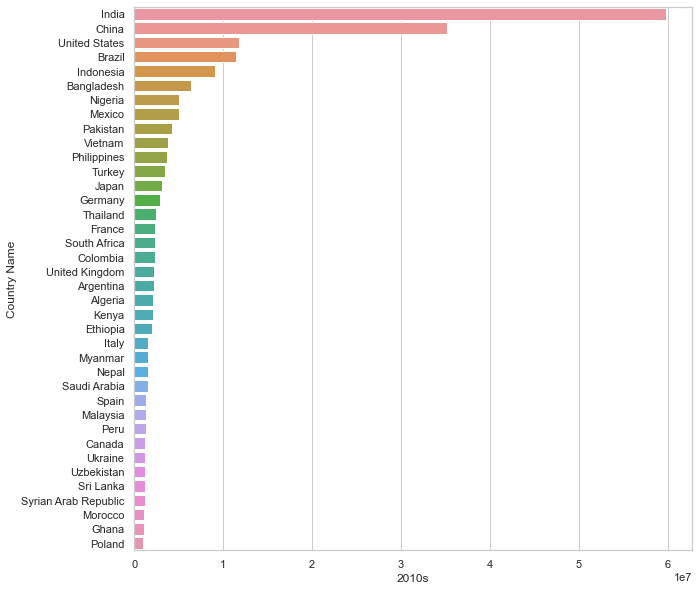

In [70]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=data_inscrip['2010s'], y=data_inscrip['Country Name']);

Nous créons la liste countries_inscrip, qui nous servira de base pour la suite :

In [71]:
countries_inscrip = data_inscrip["Country Name"].tolist()
print(countries_inscrip, end="\n\n")

['India', 'China', 'United States', 'Brazil', 'Indonesia', 'Bangladesh', 'Nigeria', 'Mexico', 'Pakistan', 'Vietnam', 'Philippines', 'Turkey', 'Japan', 'Germany', 'Thailand', 'France', 'South Africa', 'Colombia', 'United Kingdom', 'Argentina', 'Algeria', 'Kenya', 'Ethiopia', 'Italy', 'Myanmar', 'Nepal', 'Saudi Arabia', 'Spain', 'Malaysia', 'Peru', 'Canada', 'Ukraine', 'Uzbekistan', 'Sri Lanka', 'Syrian Arab Republic', 'Morocco', 'Ghana', 'Poland']



Nous avons créé 4 listes avec nos indicateurs sélectionnés : countries_pop, countries_pib, countries_internet et countries_inscrip. Nous pouvons chercher les pays en commun dans ces 4 listes,qui seront les pays que nous prendrons en compte pour notre étude. L'intersection des listes sera appelée countries_best. 

In [72]:
liste1 = countries_pop
liste2 = countries_pib
liste3 = countries_internet
liste4 = countries_inscrip

In [73]:
set1 = set(liste1)
set2 = set(liste2)
set3 = set(liste3)
set4 = set(liste4)
countries_best = set1 & set2 & set3 & set4
print(countries_best)

{'United Kingdom', 'Canada', 'Germany', 'Japan', 'France', 'United States', 'Spain'}


Les pays conseillés suite à notre analyse statistique univariée sont donc : La France, Le Royaume Uni, l'Allemagne, les USA le Japon, le Canada et l'Espagne.
Vérifions la cohérence de ces informations avec une analyse bivariée.

##Analyse bivariée sur 2 indicateurs : L'utilisation d'Internet et les études secondaires 

On crée une liste contenant nos deux indicateurs

In [74]:
ind1 = 'IT.NET.USER.P2'
ind2 = 'SE.SEC.ENRL.GC.FE'
list_ind = [ind1, ind2]

In [ ]:
On crée une variable data_historique qui nous permettra de lier nos deux indicateurs 

In [75]:
data_historique = data[(data["Country Name"].isin(countries_best)) & (data["Indicator Code"].isin(list_ind))]
display (data_historique)

,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
221098,Canada,CAN,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,1.260453e+06,1.124617e+06,1.162051e+06,NaN,1.271864e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
221275,Canada,CAN,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,9.249058e+00,6.775093e+01,8.536143e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
338378,France,FRA,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,1.991524e+06,2.076296e+06,2.215594e+06,2.297134e+06,2.398370e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
338555,France,FRA,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,2.588451e+00,4.441938e+01,8.178950e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
356703,Germany,DEU,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,NaN,NaN,2.941806e+06,3.220251e+06,2.955082e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
356880,Germany,DEU,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,4.452509e+00,6.043473e+01,8.474527e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
448328,Japan,JPN,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,3.661425e+06,4.506100e+06,4.359502e+06,3.430881e+06,3.191089e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
448505,Japan,JPN,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,5.129413e+00,5.892525e+01,8.530640e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific
745193,Spain,ESP,"Enrolment in secondary general, female (number)",SE.SEC.ENRL.GC.FE,1.181537e+06,1.654624e+06,1.686966e+06,1.330324e+06,1.336329e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
745370,Spain,ESP,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,1.648606e+00,4.114637e+01,7.282513e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia


In [76]:
#Nous retirons les colonnes qui n'auront pas d'utilité dans notre analyse:
data_historique = data_historique.drop(columns = ['Country Code', 'Indicator Name', 'Region'])

In [77]:
# Nous analysons l'indicateur d'internet :
data_historique_internet = data_historique[data_historique['Indicator Code'] == ind1]

In [78]:
# Nous remettons à zéro l'indexation
#data_historique_internet = data_historique_internet.copy().reset_index(drop=True)

In [79]:
display(data_historique_internet)

,Country Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s
221275,Canada,IT.NET.USER.P2,NaN,NaN,9.249058,67.750926,85.361429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338555,France,IT.NET.USER.P2,NaN,NaN,2.588451,44.419383,81.789500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356880,Germany,IT.NET.USER.P2,NaN,NaN,4.452509,60.434729,84.745271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448505,Japan,IT.NET.USER.P2,NaN,NaN,5.129413,58.925253,85.306401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
745370,Spain,IT.NET.USER.P2,NaN,NaN,1.648606,41.146368,72.825133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844325,United Kingdom,IT.NET.USER.P2,NaN,NaN,5.044641,62.307285,89.441457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847990,United States,IT.NET.USER.P2,NaN,NaN,12.402134,63.430002,73.035771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Nous retirons toutes les colonnes ayant des valeurs manquantes NaN :
data_historique_internet = data_historique_internet.dropna(axis=1)
display(data_historique_internet)

,Country Name,Indicator Code,1990s,2000s,2010s
221275,Canada,IT.NET.USER.P2,9.249058,67.750926,85.361429
338555,France,IT.NET.USER.P2,2.588451,44.419383,81.789500
356880,Germany,IT.NET.USER.P2,4.452509,60.434729,84.745271
448505,Japan,IT.NET.USER.P2,5.129413,58.925253,85.306401
745370,Spain,IT.NET.USER.P2,1.648606,41.146368,72.825133
844325,United Kingdom,IT.NET.USER.P2,5.044641,62.307285,89.441457
847990,United States,IT.NET.USER.P2,12.402134,63.430002,73.035771


##Nettoyage de la table "Education" :

In [81]:
data_historique_inscrip = data_historique[data_historique['Indicator Code'] == ind2]
data_historique_inscrip

,Country Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s
221098,Canada,SE.SEC.ENRL.GC.FE,1.260453e+06,1.124617e+06,1.162051e+06,NaN,1.271864e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338378,France,SE.SEC.ENRL.GC.FE,1.991524e+06,2.076296e+06,2.215594e+06,2297133.7,2.398370e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356703,Germany,SE.SEC.ENRL.GC.FE,NaN,NaN,2.941806e+06,3220251.3,2.955082e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448328,Japan,SE.SEC.ENRL.GC.FE,3.661425e+06,4.506100e+06,4.359502e+06,3430880.9,3.191089e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
745193,Spain,SE.SEC.ENRL.GC.FE,1.181537e+06,1.654624e+06,1.686966e+06,1330324.1,1.336329e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844148,United Kingdom,SE.SEC.ENRL.GC.FE,2.283664e+06,2.281497e+06,1.984784e+06,2186980.5,2.230795e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
847813,United States,SE.SEC.ENRL.GC.FE,8.961000e+06,1.035571e+07,1.014065e+07,11722463.9,1.183380e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#Indexation
#data_historique_inscrip = data_historique_inscrip.copy().reset_index(drop=True)


In [83]:
data_historique_inscrip = data_historique_inscrip.dropna(axis='columns')
display(data_historique_inscrip)

,Country Name,Indicator Code,1990s,2010s
221098,Canada,SE.SEC.ENRL.GC.FE,1.162051e+06,1.271864e+06
338378,France,SE.SEC.ENRL.GC.FE,2.215594e+06,2.398370e+06
356703,Germany,SE.SEC.ENRL.GC.FE,2.941806e+06,2.955082e+06
448328,Japan,SE.SEC.ENRL.GC.FE,4.359502e+06,3.191089e+06
745193,Spain,SE.SEC.ENRL.GC.FE,1.686966e+06,1.336329e+06
844148,United Kingdom,SE.SEC.ENRL.GC.FE,1.984784e+06,2.230795e+06
847813,United States,SE.SEC.ENRL.GC.FE,1.014065e+07,1.183380e+07


In [ ]:
On examine la corrélation entre les deux variables, en calculant le coefficient de Pearson : 

In [84]:
import scipy.stats as st
import numpy as np

print(st.pearsonr(data_historique_inscrip['2010s'],data_historique_internet['2010s'])[0])

-0.5161461330486458


Ceci nous indique que la corrélation entre ces deux variables existe mais elle est faible : Cette conclusion sur la corrélation entre les deux indicateurs ne nous permet pas d'aller plus loin dans notre analyse bivariée et ne peut nous faire avancer sur le choix de nos pays.

# Indicateurs du futur

Pour nos indicateurs du futur, les indicateurs seraient la projection sur la proportion d'études des 15-19 ans PRJ.ATT.60UP.1.MF et des étudiants en secondaires 20-39 ans PRJ.ATT.2064.4.NED.MF et en secondaire supérieur PRJ.ATT.2529.1.MF

On crée une première liste sur les pays contenant ces 3 indicateurs :

In [85]:
future = {}
for country in list_countries:
    future[country] = (data[(data['Country Name'] == country) & (data['Indicator Code'] == 'PRJ.ATT.60UP.1.MF')]['2030s'].values+data[(data['Country Name'] == country) & (data['Indicator Code'] == 'PRJ.ATT.2064.NED.MF')]['2030s'].values+ +data[(data['Country Name'] == country) & (data['Indicator Code'] == 'PRJ.ATT.2529.1.MF	')]['2030s'].values)  

In [86]:
future

{'Aruba': array([], dtype=float64),
 'Afghanistan': array([], dtype=float64),
 'Angola': array([], dtype=float64),
 'Albania': array([], dtype=float64),
 'Andorra': array([], dtype=float64),
 'United Arab Emirates': array([], dtype=float64),
 'Argentina': array([], dtype=float64),
 'Armenia': array([], dtype=float64),
 'American Samoa': array([], dtype=float64),
 'Antigua and Barbuda': array([], dtype=float64),
 'Australia': array([], dtype=float64),
 'Austria': array([], dtype=float64),
 'Azerbaijan': array([], dtype=float64),
 'Burundi': array([], dtype=float64),
 'Belgium': array([], dtype=float64),
 'Benin': array([], dtype=float64),
 'Burkina Faso': array([], dtype=float64),
 'Bangladesh': array([], dtype=float64),
 'Bulgaria': array([], dtype=float64),
 'Bahrain': array([], dtype=float64),
 'The Bahamas': array([], dtype=float64),
 'Bosnia and Herzegovina': array([], dtype=float64),
 'Belarus': array([], dtype=float64),
 'Belize': array([], dtype=float64),
 'Bermuda': array([], d

On effectue une analyse univariée sur 2 de nos indicateurs:

In [87]:
df1 = data[data["Indicator Code"] == 'PRJ.ATT.60UP.1.MF']
df1.sort_values(by=['2020s','2030s'], ascending=False, inplace=True)
df1

C:\Users\nha5600\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
765865,St. Vincent and the Grenadines,VCT,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.680,0.625,0.555,0.470,0.395,0.340,0.290,0.240,0.195,0.17,Latin America & Caribbean
758535,St. Lucia,LCA,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.625,0.590,0.525,0.405,0.315,0.250,0.200,0.150,0.120,0.10,Latin America & Caribbean
688900,Samoa,WSM,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.680,0.515,0.385,0.310,0.270,0.235,0.210,0.185,0.155,0.13,East Asia & Pacific
820840,Turkey,TUR,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.440,0.490,0.505,0.465,0.405,0.335,0.265,0.200,0.145,0.11,Europe & Central Asia
421355,Indonesia,IDN,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.370,0.425,0.400,0.350,0.280,0.215,0.160,0.110,0.075,0.05,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754870,St. Kitts and Nevis,KNA,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
806180,Togo,TGO,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa
828170,Turks and Caicos Islands,TCA,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
831835,Tuvalu,TUV,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific


De la meme manière qu'au présent, nous faisons une analyse statistique univariée sur le futur :

In [89]:
df1.describe()

,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s
count,0.0,0.0,0.0,0.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,NaN,NaN,NaN,NaN,0.181201,0.168052,0.159026,0.149383,0.141006,0.133734,0.124643,0.113571,0.100519,0.090000
std,NaN,NaN,NaN,NaN,0.142872,0.126342,0.122091,0.123810,0.128151,0.132371,0.133321,0.130095,0.122824,0.115056
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.080000,0.061250,0.050000,0.046250,0.031250,0.020000,0.010000,0.010000,0.001250,0.000000
50%,NaN,NaN,NaN,NaN,0.150000,0.150000,0.147500,0.127500,0.112500,0.100000,0.085000,0.065000,0.045000,0.040000
75%,NaN,NaN,NaN,NaN,0.250000,0.243750,0.228750,0.220000,0.220000,0.210000,0.182500,0.173750,0.175000,0.160000
max,NaN,NaN,NaN,NaN,0.680000,0.625000,0.555000,0.700000,0.770000,0.790000,0.770000,0.725000,0.665000,0.610000


Nous prenons la référence 0.23 pour les années 2030

In [90]:
df1 = df1[df1['2030s'] > 0.23]
display(df1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
765865,St. Vincent and the Grenadines,VCT,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.680,0.625,0.555,0.470,0.395,0.340,0.290,0.240,0.195,0.17,Latin America & Caribbean
758535,St. Lucia,LCA,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.625,0.590,0.525,0.405,0.315,0.250,0.200,0.150,0.120,0.10,Latin America & Caribbean
688900,Samoa,WSM,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.680,0.515,0.385,0.310,0.270,0.235,0.210,0.185,0.155,0.13,East Asia & Pacific
820840,Turkey,TUR,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.440,0.490,0.505,0.465,0.405,0.335,0.265,0.200,0.145,0.11,Europe & Central Asia
421355,Indonesia,IDN,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.370,0.425,0.400,0.350,0.280,0.215,0.160,0.110,0.075,0.05,East Asia & Pacific
589945,Myanmar,MMR,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.340,0.410,0.440,0.415,0.380,0.350,0.320,0.280,0.240,0.21,East Asia & Pacific
813510,Trinidad and Tobago,TTO,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.460,0.395,0.290,0.200,0.145,0.115,0.095,0.080,0.065,0.05,Latin America & Caribbean
370045,Greece,GRC,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.460,0.385,0.270,0.170,0.105,0.060,0.035,0.020,0.010,0.01,Europe & Central Asia
545965,Malta,MLT,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.510,0.385,0.235,0.105,0.030,0.010,0.010,0.000,0.000,0.00,Middle East & North Africa
245435,China,CHN,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.60UP.1.MF,NaN,NaN,NaN,NaN,0.440,0.380,0.300,0.220,0.145,0.105,0.075,0.065,0.050,0.04,East Asia & Pacific


In [91]:
countries_f1 = df1['Country Name'].tolist() 
print(countries_f1, end="\n\n\n")

['St. Vincent and the Grenadines', 'St. Lucia', 'Samoa', 'Turkey', 'Indonesia', 'Myanmar', 'Trinidad and Tobago', 'Greece', 'Malta', 'China', 'Tonga', 'Uruguay', 'Belize', 'Costa Rica', 'Suriname', 'Tanzania', 'Iceland', 'Argentina', 'Tunisia', 'Philippines', 'Colombia', 'Paraguay', 'Panama', 'Equatorial Guinea', 'Macao SAR, China', 'Ecuador', 'Mauritius', 'Gabon', 'Vietnam', 'Vanuatu', 'Lebanon', 'Cameroon', 'Zambia', 'Honduras', 'Iraq', 'Maldives', 'Lesotho']




2e indicateur : les 20-39 ans

In [92]:
df2 = data[data["Indicator Code"] == 'PRJ.ATT.2064.NED.MF']
df2.sort_values(by=['2020s','2030s'], ascending=False, inplace=True)
df2

C:\Users\nha5600\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
542222,Mali,MLI,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.765,0.690,0.610,0.520,0.425,0.335,0.250,0.175,0.110,0.07,Sub-Saharan Africa
619187,Niger,NER,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.760,0.670,0.580,0.490,0.395,0.305,0.220,0.155,0.100,0.07,Sub-Saharan Africa
501907,Liberia,LBR,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.725,0.645,0.560,0.465,0.365,0.275,0.190,0.125,0.075,0.05,Sub-Saharan Africa
205042,Burkina Faso,BFA,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.725,0.635,0.545,0.450,0.360,0.270,0.195,0.135,0.080,0.05,Sub-Saharan Africa
388292,Guinea,GIN,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.665,0.570,0.465,0.365,0.270,0.195,0.125,0.080,0.045,0.03,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754792,St. Kitts and Nevis,KNA,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
806102,Togo,TGO,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa
828092,Turks and Caicos Islands,TCA,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
831757,Tuvalu,TUV,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific


In [93]:
df2.describe()

,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s
count,0.0,0.0,0.0,0.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.00000,154.000000,154.000000,154.000000,154.000000
mean,NaN,NaN,NaN,NaN,0.123604,0.093149,0.068864,0.050097,0.036071,0.02487,0.016396,0.010487,0.006169,0.003896
std,NaN,NaN,NaN,NaN,0.189037,0.159421,0.132113,0.106628,0.083890,0.06330,0.045065,0.030948,0.019418,0.013201
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.006250,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.040000,0.022500,0.010000,0.005000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,0.148750,0.098750,0.063750,0.035000,0.018750,0.01000,0.003750,0.000000,0.000000,0.000000
max,NaN,NaN,NaN,NaN,0.765000,0.690000,0.610000,0.520000,0.425000,0.33500,0.250000,0.175000,0.120000,0.090000


On raisonne donc sur plus de 0.07 dans les années 2030

In [94]:
df2 = df2[df2['2030s'] > 0.07]
display(df2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970s,1980s,1990s,2000s,2010s,2020s,2030s,2040s,2050s,2060s,2070s,2080s,2090s,2100s,Region
542222,Mali,MLI,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.765,0.690,0.610,0.520,0.425,0.335,0.250,0.175,0.110,0.07,Sub-Saharan Africa
619187,Niger,NER,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.760,0.670,0.580,0.490,0.395,0.305,0.220,0.155,0.100,0.07,Sub-Saharan Africa
501907,Liberia,LBR,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.725,0.645,0.560,0.465,0.365,0.275,0.190,0.125,0.075,0.05,Sub-Saharan Africa
205042,Burkina Faso,BFA,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.725,0.635,0.545,0.450,0.360,0.270,0.195,0.135,0.080,0.05,Sub-Saharan Africa
388292,Guinea,GIN,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.665,0.570,0.465,0.365,0.270,0.195,0.125,0.080,0.045,0.03,Sub-Saharan Africa
234362,Chad,TCD,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.610,0.545,0.475,0.415,0.355,0.295,0.235,0.175,0.120,0.09,Sub-Saharan Africa
586202,Mozambique,MOZ,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.615,0.530,0.445,0.360,0.290,0.215,0.145,0.100,0.060,0.04,Sub-Saharan Africa
714477,Sierra Leone,SLE,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.560,0.490,0.400,0.320,0.250,0.185,0.125,0.080,0.045,0.03,Sub-Saharan Africa
769452,Sudan,SDN,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.600,0.490,0.380,0.275,0.195,0.125,0.080,0.045,0.025,0.01,Sub-Saharan Africa
703482,Senegal,SEN,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.2064.NED.MF,NaN,NaN,NaN,NaN,0.565,0.470,0.375,0.280,0.205,0.145,0.090,0.055,0.035,0.02,Sub-Saharan Africa


In [95]:
countries_f2 = df2['Country Name'].tolist() 
print(countries_f2, end="\n\n\n")

['Mali', 'Niger', 'Liberia', 'Burkina Faso', 'Guinea', 'Chad', 'Mozambique', 'Sierra Leone', 'Sudan', 'Senegal', 'Pakistan', 'Somalia', 'Benin', 'Guinea-Bissau', 'Ethiopia', 'Bhutan', 'Burundi', 'Morocco', 'Nepal', 'Ghana', 'India', 'Bangladesh', 'Nigeria', 'Rwanda', 'Central African Republic', 'Madagascar', 'Timor-Leste', 'Malawi', 'Guatemala', 'Cambodia', 'Comoros', 'Lao PDR', 'Uganda', 'Nicaragua']




In [97]:
listef1 = countries_f1
listef2 = countries_f2

In [98]:
setf1 = set(listef1)
setf2 = set(listef2)

In [99]:
countries_future = setf1 & setf2 
print(countries_future)

set()


Les indicateurs du futur ne nous permettent pas d'avoir une liste totalement exhaustive des pays dans lesquels il serait opportun de s'implanter.